The differential equations are
\begin{equation}
    \dot{\theta} = \omega
\end{equation}

\begin{equation}
    \dot{\omega} = \sin \tau - \left(\frac{g}{L\omega_0^2}\right) \sin \theta
\end{equation}

Using ODEInt to solve the equation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

In [6]:
def model(z,t):
    A=1
    x = z[0]
    y = z[1]
    dxdt = y
    dydt = np.sin(t)-A*np.sin(x)
    dzdt = [dxdt,dydt]
    return dzdt

C:\Users\steek\AppData\Local\Temp\ipykernel_129724\4205267835.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  phplot.scatter((x+np.pi)%(2*np.pi)-np.pi,y, c = [i/N, 0, (1-i/N)], s = 1)


Text(0, 0.5, '$\\omega_1$')

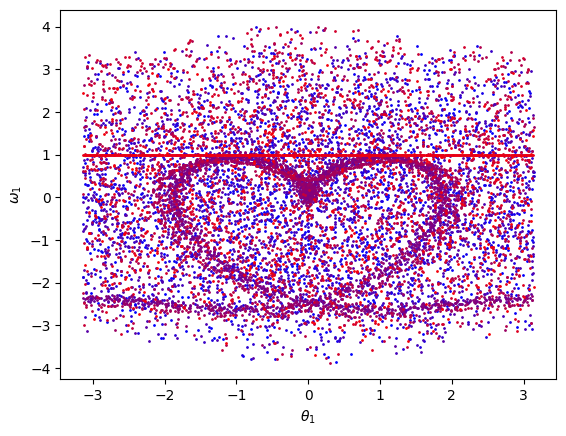

In [7]:


t = np.linspace(0, 1000, 500)
N = 23

omegalist = np.linspace (-1.1, 1.1, N)
phplot = plt.subplot(1,1,1)
for i in range (N):
    z0 = [0,omegalist[i]]
    z = odeint(model,z0,t)
    Nout = len(t)
    x = z[:,0]
    y = z[:,1]
    phplot.scatter((x+np.pi)%(2*np.pi)-np.pi,y, c = [i/N, 0, (1-i/N)], s = 1)
phplot.set_xlabel(r'$\theta_1$')
phplot.set_ylabel(r'$\omega_1$')


Part b

In [12]:
def model_2(z,t, L, o0):
    g=9.8
    x = z[0]
    y = z[1]
    u = z[2]
    dxdt = y
    dydt = np.sin(t)-g/(L*o0**2)*np.sin(x)
    dudt = 1
    dzdt = [dxdt, dydt, dudt]
    return dzdt

C:\Users\steek\AppData\Local\Temp\ipykernel_129724\1570710563.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  phplot.scatter((x+np.pi)%(2*np.pi)-np.pi,y, c = [i/N, 0, (1-i/N)], s=1)


Text(0, 0.5, '$\\omega_1$')

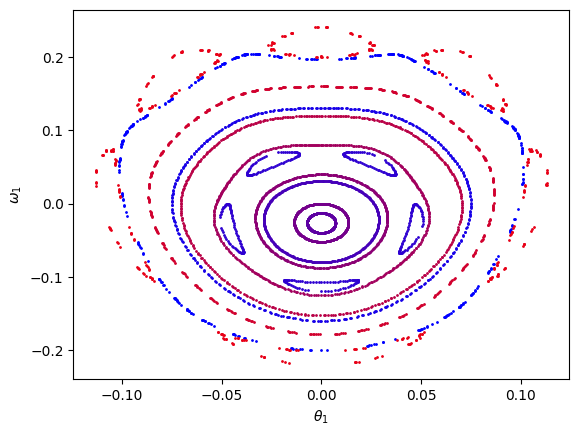

In [9]:
Nout = 400
t = np.linspace(0, 4*np.pi*Nout, Nout+1)
N = 11
L = 1
o0 = np.sqrt(1*9.8/L)
omegalist = np.linspace (-0.2, 0.2, N)
phplot = plt.subplot(1,1,1)
for i in range (N):
    z0 = [0,omegalist[i],0]
    z = odeint(model_2,z0,t, args=(L, o0))
    Nout = len(t)
    x = z[:,0]
    y = z[:,1]
    phplot.scatter((x+np.pi)%(2*np.pi)-np.pi,y, c = [i/N, 0, (1-i/N)], s=1)
phplot.set_xlabel(r'$\theta_1$')
phplot.set_ylabel(r'$\omega_1$')

C:\Users\steek\AppData\Local\Temp\ipykernel_129724\3321782455.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  phplot.scatter((x+np.pi)%(2*np.pi)-np.pi,y, c = [i/N, 0, (1-i/N)], s=1)


Text(0, 0.5, '$\\omega_1$')

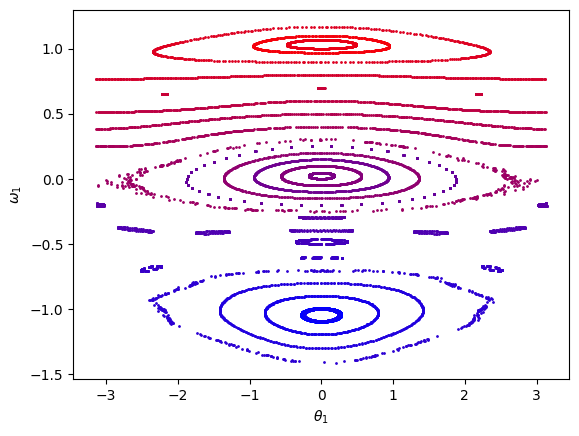

In [8]:


Nout = 400
t = np.linspace(0, 4*np.pi*Nout, Nout+1)
N = 23
L = 1
o0 = np.sqrt(9.8/(0.05*L))
omegalist = np.linspace (-1.1,1.1, N)
phplot = plt.subplot(1,1,1)
for i in range (N):
    z0 = [0,omegalist[i],0]
    z = odeint(model_2,z0,t, args=(L, o0))
    Nout = len(t)
    x = z[:,0]
    y = z[:,1]
    phplot.scatter((x+np.pi)%(2*np.pi)-np.pi,y, c = [i/N, 0, (1-i/N)], s=1)
phplot.set_xlabel(r'$\theta_1$')
phplot.set_ylabel(r'$\omega_1$')

Let's do a double pendulum

In [10]:
def model_dpen(z, theta2):
    omega1 = z[0]  # omega1
    omega2 = z[1]  # omega2
    theta1 = z[2]  # theta1

    delta_theta = theta1 - theta2  # Delta theta

    d_omega1_dtheta2 = (
        -np.sin(delta_theta) * (omega1**2 * np.cos(delta_theta) + omega2**2)
        - 2 * np.sin(theta1) + np.sin(theta2) * np.cos(delta_theta)
    ) / (omega2 * (1 + np.sin(delta_theta)**2))

    d_omega2_dtheta2 = (
        np.sin(delta_theta) * (omega1**2 + omega2**2 * np.cos(delta_theta))
        + np.sin(theta1) * np.cos(delta_theta) - 2 * np.sin(theta2)
    ) / (omega2 * (1 + np.sin(delta_theta)**2))

    d_theta1_dtheta2 = omega1 / omega2

    dzdt = [d_omega1_dtheta2, d_omega2_dtheta2, d_theta1_dtheta2]
    return dzdt


C:\Users\steek\AppData\Local\Temp\ipykernel_129724\2969380434.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  arg = (1 + H - omega1_0[a]**2 - 0.5 * omega2_0[b]**2) / (omega1_0[a] * omega2_0[b] - 1)
C:\Users\steek\AppData\Local\Temp\ipykernel_129724\2969380434.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  phplot.scatter((x + np.pi) % (2 * np.pi) - np.pi, y, c=[i / N, 0, (1 - i / N)], s=1)
C:\Users\steek\AppData\Local\Temp\ipykernel_129724\3097840014.py:8: RuntimeWarning: invalid value encountered in scalar divide
  d_omega1_dtheta2 = (
C:\Users\steek\AppData\Local\Temp\ipykernel_129724\3097840014.py:13: RuntimeWarning: invalid value encountered in scalar divide
  d_omega2_dtheta

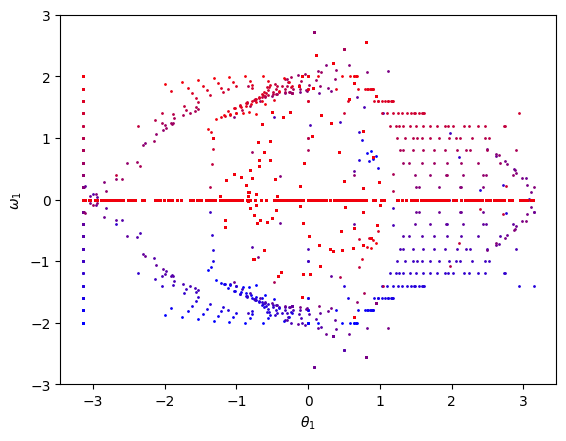

In [11]:
N = 21
H = 1

omega1_0 = np.linspace(-2, 2, N)
omega2_0 = np.linspace(-2, 2, N)
theta1_0 = np.zeros([N, N])

for a in range(N):
    for b in range(N):
        arg = (1 + H - omega1_0[a]**2 - 0.5 * omega2_0[b]**2) / (omega1_0[a] * omega2_0[b] - 1)
        arg = np.clip(arg, -1, 1)  # Clamp to avoid invalid arccos
        theta1_0[a][b] = np.arccos(arg)

theta2 = np.linspace(0, 1000 * np.pi, 501)
phplot = plt.subplot(1, 1, 1)

for i in range(N):
    for k in range(N):
        z0 = [omega1_0[i], omega2_0[k], theta1_0[i][k]]
        z = odeint(model_dpen, z0, theta2)
        y = z[:, 0]  # omega1
        x = z[:, 2]  # theta1
        phplot.scatter((x + np.pi) % (2 * np.pi) - np.pi, y, c=[i / N, 0, (1 - i / N)], s=1)

phplot.set_xlabel(r'$\theta_1$')
phplot.set_ylabel(r'$\omega_1$')
phplot.set_ylim(-3, 3)
plt.show()